In [3]:
import qiskit as q
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from matplotlib import style
import math
style.use("dark_background")
%matplotlib inline

statevec_simulator = q.Aer.get_backend("statevector_simulator")
qasm_sim = q.Aer.get_backend('qasm_simulator')

### Uncertain Qubits

In [4]:
c = q.QuantumCircuit(2,2)
c.ry(math.pi/4, 0)
c.ry(math.pi/4, 1)
orig_statevec = q.execute(c, backend=statevec_simulator).result().get_statevector()
c.measure([0,1], [0,1])
c.draw()

┌─────────┐┌─┐   
q_0: ┤ Ry(π/4) ├┤M├───
     ├─────────┤└╥┘┌─┐
q_1: ┤ Ry(π/4) ├─╫─┤M├
     └─────────┘ ║ └╥┘
c: 2/════════════╩══╩═
                 0  1

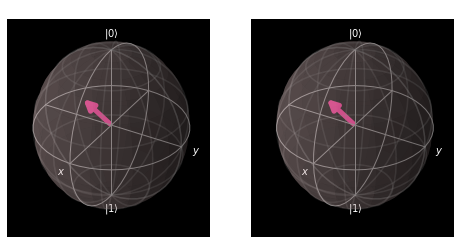

In [5]:
plot_bloch_multivector(orig_statevec)

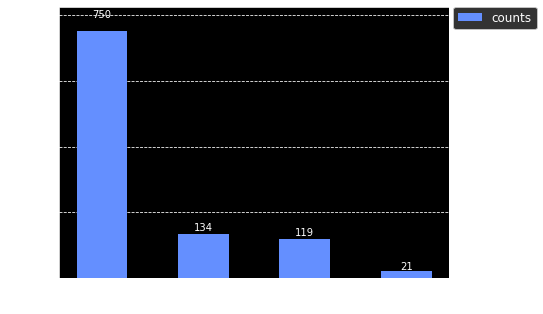

In [6]:
orig_counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([orig_counts], legend=['counts'])

### Uncertain qubits, hadmards at front

In [7]:
c = q.QuantumCircuit(2,2)
c.h(0)
c.h(1)
c.ry(math.pi/4, 0)
c.ry(math.pi/4, 1)
statevec = q.execute(c, backend=statevec_simulator).result().get_statevector()
c.measure([0,1], [0,1])
c.draw()

┌───┐┌─────────┐┌─┐   
q_0: ┤ H ├┤ Ry(π/4) ├┤M├───
     ├───┤├─────────┤└╥┘┌─┐
q_1: ┤ H ├┤ Ry(π/4) ├─╫─┤M├
     └───┘└─────────┘ ║ └╥┘
c: 2/═════════════════╩══╩═
                      0  1

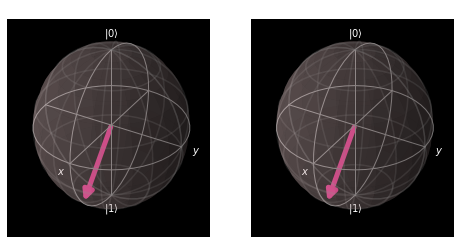

In [8]:
plot_bloch_multivector(statevec)

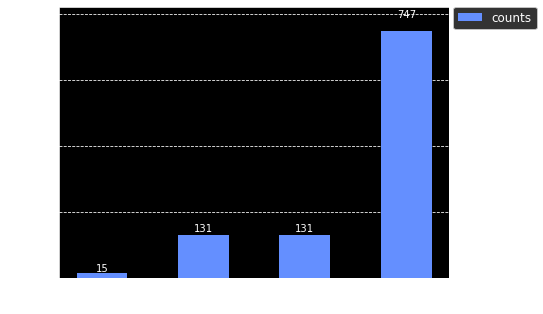

In [9]:
counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([counts], legend=['counts'])

In [10]:
c = q.QuantumCircuit(2,2)
c.h(0)
c.h(1)
c.ry(math.pi/4, 0)
c.ry(math.pi/4, 1)
c.h(0)
c.h(1)
statevec = q.execute(c, backend=statevec_simulator).result().get_statevector()
c.measure([0,1], [0,1])
c.draw()

┌───┐┌─────────┐┌───┐┌─┐   
q_0: ┤ H ├┤ Ry(π/4) ├┤ H ├┤M├───
     ├───┤├─────────┤├───┤└╥┘┌─┐
q_1: ┤ H ├┤ Ry(π/4) ├┤ H ├─╫─┤M├
     └───┘└─────────┘└───┘ ║ └╥┘
c: 2/══════════════════════╩══╩═
                           0  1

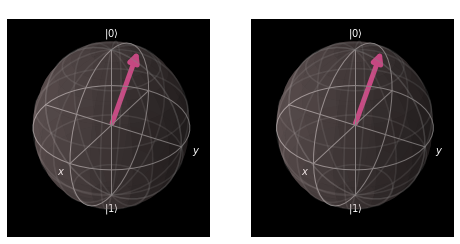

In [11]:
plot_bloch_multivector(statevec)

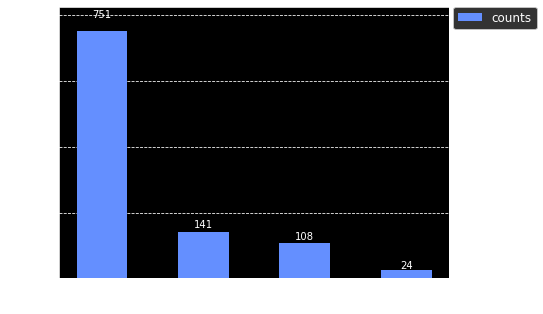

In [12]:
counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([counts], legend=['counts'])

### certain qubits

In [13]:
c = q.QuantumCircuit(2,2)
c.x(0)
c.x(1)
orig_statevec = q.execute(c, backend=statevec_simulator).result().get_statevector()
c.measure([0,1], [0,1])
c.draw()

┌───┐┌─┐   
q_0: ┤ X ├┤M├───
     ├───┤└╥┘┌─┐
q_1: ┤ X ├─╫─┤M├
     └───┘ ║ └╥┘
c: 2/══════╩══╩═
           0  1

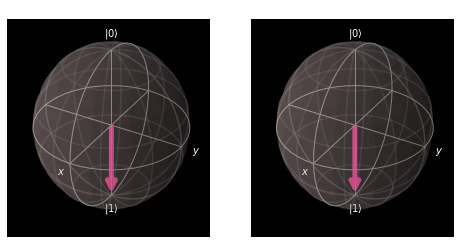

In [15]:
plot_bloch_multivector(orig_statevec)

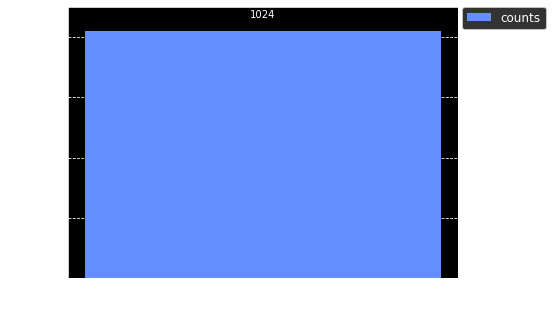

In [16]:
orig_counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([orig_counts], legend=['counts'])

### Hadmard in front of certain qubits

In [17]:
c = q.QuantumCircuit(2,2)
c.h(0)
c.h(1)
c.x(0)
c.x(1)
orig_statevec = q.execute(c, backend=statevec_simulator).result().get_statevector()
c.measure([0,1], [0,1])
c.draw()

┌───┐┌───┐┌─┐   
q_0: ┤ H ├┤ X ├┤M├───
     ├───┤├───┤└╥┘┌─┐
q_1: ┤ H ├┤ X ├─╫─┤M├
     └───┘└───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

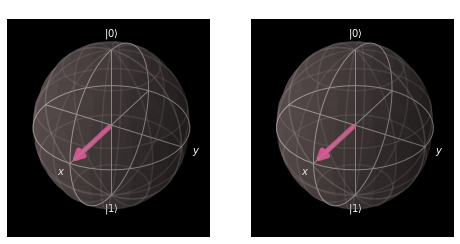

In [18]:
plot_bloch_multivector(orig_statevec)

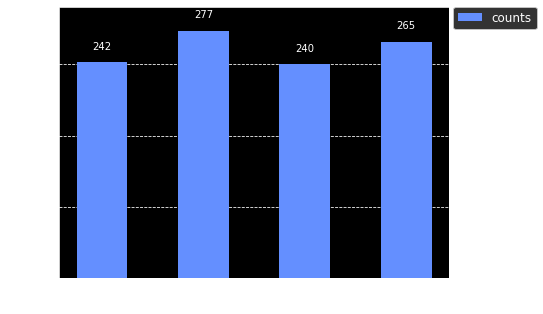

In [19]:
counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([counts], legend=['counts'])

### hadamard sandwich certain qb

In [20]:
c = q.QuantumCircuit(2,2)
c.h(0)
c.h(1)
c.x(0)
c.x(1)
c.h(0)
c.h(1)
statevec = q.execute(c, backend=statevec_simulator).result().get_statevector()
c.measure([0,1], [0,1])
c.draw()

┌───┐┌───┐┌───┐┌─┐   
q_0: ┤ H ├┤ X ├┤ H ├┤M├───
     ├───┤├───┤├───┤└╥┘┌─┐
q_1: ┤ H ├┤ X ├┤ H ├─╫─┤M├
     └───┘└───┘└───┘ ║ └╥┘
c: 2/════════════════╩══╩═
                     0  1

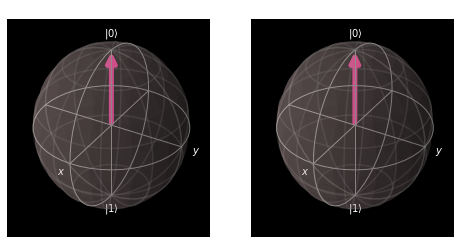

In [22]:
plot_bloch_multivector(statevec)

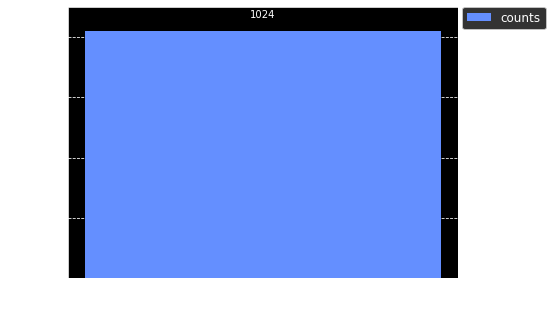

In [23]:
counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([counts], legend=['counts'])

In [24]:
def balanced_black_box(c):
    c.cx(0,2)
    c.cx(1,2)
    return c
def constant_black_box(c):
    return c

In [25]:
c = q.QuantumCircuit(3,2)
c = balanced_black_box(c)
c.draw()

q_0: ──■───────
       │       
q_1: ──┼────■──
     ┌─┴─┐┌─┴─┐
q_2: ┤ X ├┤ X ├
     └───┘└───┘
c: 2/══════════

In [32]:
c = q.QuantumCircuit(3,2)
c.x(2)
c.barrier()
c.h(0)
c.h(1)
c.h(2)
c.barrier()
c = balanced_black_box(c)
c.barrier()
c.h(0)
c.h(1)
c.measure([0,1], [0,1])
c.draw()

░ ┌───┐ ░            ░ ┌───┐┌─┐   
q_0: ──────░─┤ H ├─░───■────────░─┤ H ├┤M├───
           ░ ├───┤ ░   │        ░ ├───┤└╥┘┌─┐
q_1: ──────░─┤ H ├─░───┼────■───░─┤ H ├─╫─┤M├
     ┌───┐ ░ ├───┤ ░ ┌─┴─┐┌─┴─┐ ░ └───┘ ║ └╥┘
q_2: ┤ X ├─░─┤ H ├─░─┤ X ├┤ X ├─░───────╫──╫─
     └───┘ ░ └───┘ ░ └───┘└───┘ ░       ║  ║ 
c: 2/═══════════════════════════════════╩══╩═
                                        0  1

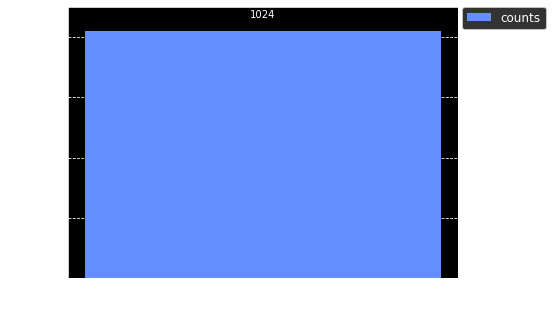

In [33]:
counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([counts], legend=['counts'])

In [34]:
c = q.QuantumCircuit(3,2)
c.x(2)
c.barrier()
c.h(0)
c.h(1)
c.h(2)
c.barrier()
c = constant_black_box(c)
c.barrier()
c.h(0)
c.h(1)
c.measure([0,1], [0,1])
c.draw()

░ ┌───┐ ░  ░ ┌───┐┌─┐   
q_0: ──────░─┤ H ├─░──░─┤ H ├┤M├───
           ░ ├───┤ ░  ░ ├───┤└╥┘┌─┐
q_1: ──────░─┤ H ├─░──░─┤ H ├─╫─┤M├
     ┌───┐ ░ ├───┤ ░  ░ └───┘ ║ └╥┘
q_2: ┤ X ├─░─┤ H ├─░──░───────╫──╫─
     └───┘ ░ └───┘ ░  ░       ║  ║ 
c: 2/═════════════════════════╩══╩═
                              0  1

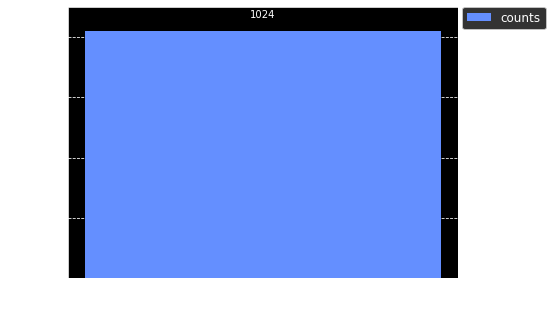

In [35]:
counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([counts], legend=['counts'])

In [36]:
c = q.QuantumCircuit(1,1)
c.x(0)
c.h(0)
c.draw()

┌───┐┌───┐
  q: ┤ X ├┤ H ├
     └───┘└───┘
c: 1/══════════

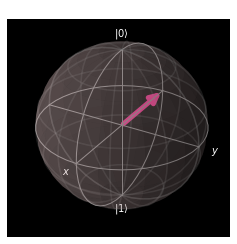

In [37]:
statevec = q.execute(c, backend=statevec_simulator).result().get_statevector()
plot_bloch_multivector(statevec)

In [38]:
c = q.QuantumCircuit(3,2)
c.x(2)
c.barrier()
c.h(0)
c.h(1)
c.h(2)
c.barrier()
c = balanced_black_box(c)
c.barrier()
c.h(0)
c.h(1)
c.measure([0,1], [0,1])
c.draw()

░ ┌───┐ ░            ░ ┌───┐┌─┐   
q_0: ──────░─┤ H ├─░───■────────░─┤ H ├┤M├───
           ░ ├───┤ ░   │        ░ ├───┤└╥┘┌─┐
q_1: ──────░─┤ H ├─░───┼────■───░─┤ H ├─╫─┤M├
     ┌───┐ ░ ├───┤ ░ ┌─┴─┐┌─┴─┐ ░ └───┘ ║ └╥┘
q_2: ┤ X ├─░─┤ H ├─░─┤ X ├┤ X ├─░───────╫──╫─
     └───┘ ░ └───┘ ░ └───┘└───┘ ░       ║  ║ 
c: 2/═══════════════════════════════════╩══╩═
                                        0  1